## Public Health Indicators of Susceptibility
This notebook provides data and a workflow to visualize a few population-level health statistics which may be related to *susceptibility* to heat-illness/mortality. Other factors may be important as well -- feel free to explore them! The data in this notebook primarily comes from the Chicago Health Atlas: https://chicagohealthatlas.org/, with data filtered by "Indicators."

**Why does this matter?**

On the pathway from weather to health outcomes, *susceptibility* includes personal factors which increase an individual's risk of an adverse health outcome when exposed to heat. For instance, it is well known that human thermoregulatory response is weaker in elderly individuals (as well as very young children) compared to younger/middle-aged adults. Individuals may also have suppressed thermoregulatory capacity if they have diabetes, underlying cardiovascular diseases (such as hypertension), take certain medications, etc. At CROCUS, we are interested in understanding how weather conditions may affect neighborhoods differently -- not just in terms of the temperature reading, but in terms of the impact on community. Thus, looking at population-level health factors can help us get a sense of how *susceptibility* differs across neighborhoods.

**Interpretation**

It can be tricky to differentiate between *susceptibility* and individual barriers to *adaptive capacity*. For instance, individuals with limited mobility have historically fared worse in extreme heat conditions compared to the general population. Is that because these individuals' health conditions cause them to have a less effective thermoregulatory response? (i.e. people who use wheelchairs sometimes have slower blood circulation). Or is it because their health conditions limit their capacity to adapt to the heat by, for example, seeking shelter in a cool environment? Likely the answer is a combination of both.

Ultimately, these distinctions between "susceptibility," "adaptive capacity," and other factors are a bit arbitrary. We should use these labels in-so-far as they help us generate a useful model, but we should not trick ourselves by sticking too closely to these categories of risk-factors.

**Data**

I have provided pre-cleaned data from the Chicago Health Atlas for the following list of indicators. To see how I cleaned this data, check out `crocus_heat/datasets/chi_health_atlas_cleaning.ipynb`.
- Adult asthma rates
- Adult diabetes rates
- Adult loneliness rates
- Asthma emergency department visits
- Behavioral health related hospitalizations
- Behavioral health treatment rates
- Diabetes related hospitalizations
- Hypertension rates
- Mood-disorder related hospitalizations
- Serious Psychological Distress (reported rates)
- Scizophrenic Disorder related hospitalizations

In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

health_data_path = "../datasets/chi_health_atlas_clean/"
boundaries_data_path = "../datasets/boundaries_geospatial_clean/"
commareas = gpd.read_file(boundaries_data_path + "chi_commareas_2018_clean.shp")
zips = gpd.read_file(boundaries_data_path + "chi_zip_2020_clean.shp")

### Hypertension -- example of statistics by community area
Source info available at the following links (click "Sources")
- https://chicagohealthatlas.org/indicators/HCSHYT?topic=hypertension
- https://chicagohealthatlas.org/indicators/HCSHYTP?topic=hypertension-rate

In [28]:
hypertension = pd.read_csv(health_data_path + "hypertension_commareas.csv")

# Some health datasets do not have data for every community area
print("Rows in health dataset:", len(hypertension))
print("Rows in boundary dataset:", len(commareas))

# Create a shape object for health info in each community area
hypertension_shp = pd.merge(left=commareas, right=hypertension, how="outer", left_on=["community", "area_num"], right_on=["community", "area_num"])
hypertension_shp.head()

Rows in health dataset: 77
Rows in boundary dataset: 77


,area_num,community,shape_area,shape_len,geometry,hypertension_count,hypertension_count_moe,hypertension_rate,hypertension_rate_moe
0,35,DOUGLAS,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",4200.0,2032.912947,22.596948,10.149904
1,36,OAKLAND,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",2200.0,774.370653,36.087308,12.123445
2,37,FULLER PARK,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",5100.0,2315.327459,48.715214,16.142695
3,38,GRAND BOULEVARD,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",5700.0,1770.455932,44.625521,11.209690
4,39,KENWOOD,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",8000.0,4832.891989,56.404984,16.227420


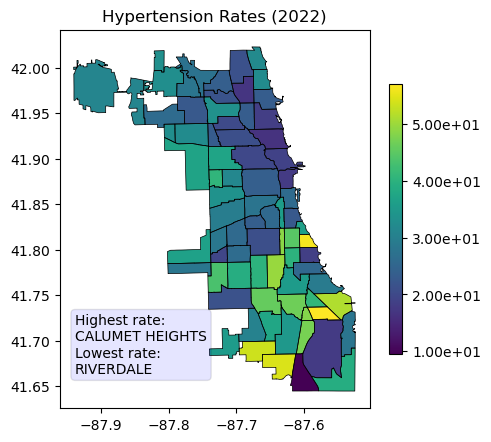

In [30]:
# Plot diabetes rate by community area
ax = commareas.boundary.plot(edgecolor="black", linewidth=0.5, figsize=[5,10])
ax = hypertension_shp.plot(ax=ax, column="hypertension_rate", legend=True, cmap="viridis", legend_kwds={"shrink":0.35, "format":'%.2e'})
ax.set_title("Hypertension Rates (2022)")

# Note the community areas with highest / lowest rate
hypertension_max = np.nanmax(hypertension_shp["hypertension_rate"])
hypertension_min = np.nanmin(hypertension_shp["hypertension_rate"])
commarea_max = hypertension_shp.loc[hypertension_shp["hypertension_rate"] == hypertension_max, "community"].item()
commarea_min = hypertension_shp.loc[hypertension_shp["hypertension_rate"] == hypertension_min, "community"].item()

textstr1 = "Highest rate:\n" + str(commarea_max) + \
           "\nLowest rate:\n" + str(commarea_min)
props = dict(boxstyle='round', facecolor='blue', alpha=0.1)
ax.text(0.05, 0.25, textstr1, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.savefig("../plots/hypertension_commareas.png", bbox_inches="tight", facecolor="white")
plt.show()

## Diabetes related hospitalizations -- example of statistics by zip code
Source info available at the following links (click "Sources")
- https://chicagohealthatlas.org/indicators/HDDIA?topic=diabetes-related-hosp
- https://chicagohealthatlas.org/indicators/HDDIAR?topic=diabetes-related-hospitalization-rate

In [25]:
diabetes_hosp = pd.read_csv(health_data_path + "diabetes_hosp_zip_codes.csv")

# Some health datasets do not have data for every zip code
print("Rows in health dataset:", len(diabetes_hosp))
print("Rows in boundary dataset:", len(zips))

# Create a shape object for health info in each zip code
diabetes_hosp_shp = pd.merge(left=zips, right=diabetes_hosp, how="outer", left_on="zip", right_on="zip_code")
diabetes_hosp_shp.head()

Rows in health dataset: 51
Rows in boundary dataset: 61


,zip,shape_area,shape_len,geometry,zip_code,diabetes_hosp_count,diabetes_hosp_count_moe,diabetes_hosp_rate,diabetes_hosp_rate_moe
0,60647,1.060523e+08,42720.044406,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",60647.0,165.0,NaN,27.1,3.734821
1,60639,1.274761e+08,48103.782721,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",60639.0,211.0,NaN,29.4,3.525000
2,60707,4.506904e+07,27288.609612,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",60707.0,69.0,NaN,14.9,2.979464
3,60707,3.450671e+06,7909.890407,"POLYGON ((-87.80662 41.93451, -87.80686 41.934...",60707.0,69.0,NaN,14.9,2.979464
4,60622,7.085383e+07,42527.989679,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",60622.0,69.0,NaN,20.6,4.280357


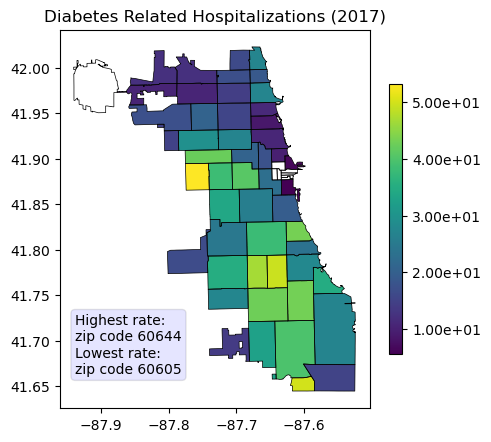

In [27]:
# Plot diabetes hospitalization rates by zip code
ax = zips.boundary.plot(edgecolor="black", linewidth=0.5, figsize=[5,10])
ax = diabetes_hosp_shp.plot(ax=ax, column="diabetes_hosp_rate", legend=True, cmap="viridis", legend_kwds={"shrink":0.35, "format":'%.2e'})
ax.set_title("Diabetes Related Hospitalizations (2017)")

# Note the zip codes with highest / lowest rate
diabetes_hosp_max = np.nanmax(diabetes_hosp_shp["diabetes_hosp_rate"])
diabetes_hosp_min = np.nanmin(diabetes_hosp_shp["diabetes_hosp_rate"])
zip_max = diabetes_hosp_shp.loc[diabetes_hosp_shp["diabetes_hosp_rate"] == diabetes_hosp_max, "zip"].item()
zip_min = diabetes_hosp_shp.loc[diabetes_hosp_shp["diabetes_hosp_rate"] == diabetes_hosp_min, "zip"].item()

textstr1 = "Highest rate:\nzip code " + str(zip_max) + \
           "\nLowest rate:\nzip code " + str(zip_min)
props = dict(boxstyle='round', facecolor='blue', alpha=0.1)
ax.text(0.05, 0.25, textstr1, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.savefig("../plots/diabetes_hosp_zip_codes.png", bbox_inches="tight", facecolor="white")
plt.show()

## Now you can make your own!
Follow the templates above for whatever indicator(s) you are interested in.